In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


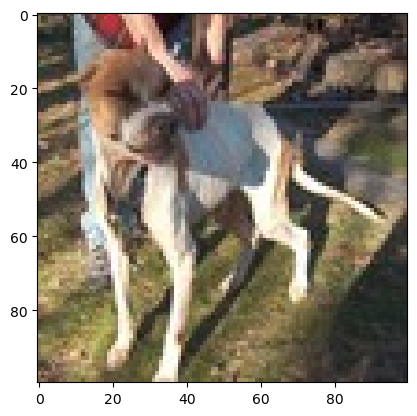

In [26]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [27]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [28]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
model.fit(X_train, Y_train, epochs = 15, batch_size = 64)

Epoch 1/15
32/32 [==============================] - 11s 314ms/step - loss: 0.7207 - accuracy: 0.4995
Epoch 2/15
32/32 [==============================] - 10s 307ms/step - loss: 0.6926 - accuracy: 0.5200
Epoch 3/15
32/32 [==============================] - 10s 307ms/step - loss: 0.6825 - accuracy: 0.5700
Epoch 4/15
32/32 [==============================] - 10s 315ms/step - loss: 0.6504 - accuracy: 0.6340
Epoch 5/15
32/32 [==============================] - 10s 328ms/step - loss: 0.5979 - accuracy: 0.6900
Epoch 6/15
32/32 [==============================] - 10s 317ms/step - loss: 0.5672 - accuracy: 0.7100
Epoch 7/15
32/32 [==============================] - 10s 316ms/step - loss: 0.5294 - accuracy: 0.7155
Epoch 8/15
32/32 [==============================] - 10s 317ms/step - loss: 0.4481 - accuracy: 0.7935
Epoch 9/15
32/32 [==============================] - 10s 311ms/step - loss: 0.3912 - accuracy: 0.8275
Epoch 10/15
32/32 [==============================] - 10s 325ms/step - loss: 0.3531 - accura

In [37]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 47ms/step - loss: 0.7838 - accuracy: 0.7125


[0.7837725281715393, 0.7124999761581421]

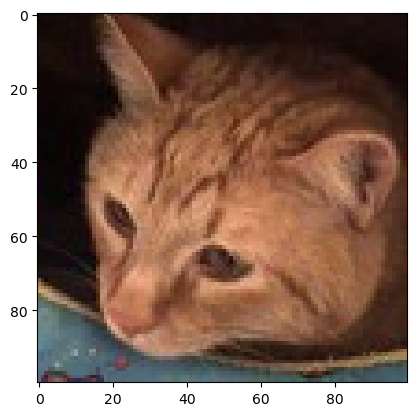

1/1 [==============================] - 0s 42ms/step
Our model says it is a : cat


In [42]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred) 